In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 ### 1) Importación y preparación de datos


In [248]:
article_1 = '''KARACHI: The Sindh government has decided to bring down public
transport fares by 7 per cent due to massive reduction in petroleum product
prices by the federal government, Geo News reported.Sources said reduction in
fares will be applicable on public transport, rickshaw, taxi and other means of
traveling. Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the
government decision.KTI President Irshad Bukhari said the commuters are charged
the lowest fares in Karachi as compare to other parts of the country, adding that
80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi
transporters will cut fares when decrease in CNG prices will be made.'''
article_2 = '''HONG KONG: Hong Kong shares opened 0.66 percent lower Monday
following a tepid lead from Wall Street, as the first full week of the new year
kicked off. The benchmark Hang Seng Index dipped 158.63 points to 23,699.19.'''
article_3 = '''KARACHI: Wholesale market rates for sugar dropped to less than Rs
50 per kg following the resumption of sugar cane crushing by sugar mills in Sindh.
Within two days, the rate dropped by Rs 1.70 to Rs 49.80 per kg in Karachi
Whole Sale Market. According to dealers, the resumption of sugar cane crushing by
the mills stabilised the supply to the market with an immediate effect on price
as well. Industry experts said that the quality of sugar cane is excellent in
Sindh and approximately 100 kg of sugar cane can produce 11 kg of sugar.'''
article_4 = '''ISLAMABAD: Long queues of vehicles on fuel stations were visible
in different parts of the country as the petrol became rare commodity on
Thursday. Federal Minister for Petroleum Shahid Khaqan Abbasi says "it may take
up to ten days to bring the situation to normality". He claimed that northern
areas of Pakistan had been facing the petrol shortage. The minister cited the
recent decline in petroleum prices and delay in a shipment as reasons for the
shortage.He said situation would improve as soon as shipment reached Pakistan.
Sources told Geo News hat due to financial restraints the Pakistan State Oil has
been unable import petrol.'''
article_5 = '''KARACHI: The final shipment of Chinese manufactured Rail Engines
arrived in Pakistan on Friday. Federal Railways Minister, Khwaja Saad Rafique
says, the inclusion of the new engines will help ease the shortfall faced by
Pakistan Railways. The shipment includes 2000 and 3000-horse-power engines which
will be used to pull freight bogeys. Rafique told journalists, the inclusion of
15 new engines has brought Pakistan Railways total strength to 268 engines
however more engines are still required.'''
article_6 = '''SYDNEY: Cricket fever has gripped Australia with the World Cup
just days away. Fans from around the world have thronged to the country and
hotels are capitalising. Prices of rooms have almost doubled to 300 dollars and
hotels are experiencing full bookings. Experts estimate that during the mega
event Australia will generate 1.5 million US dollars just from hotel bookings. If
the cost of internal air travel, taxis and tickets is taken into consideration,
Australia stands to generate two million US dollars during the World Cup.'''
article_7 = '''SAN FRANCISCO: Apple Inc aims to begin producing electric vehicles
as early as 2020, Bloomberg reported. The report cited people with knowledge of
the matter as saying, a seemingly aggressive target for a mobile devices maker
with little experience in car manufacture.The iPhone maker is pushing its "car
team" of about 200 people to meet that goal. But Apple may decide to scrap its
car-making effort, or delay it, if executives grew unhappy with its progress, the
news agency said.'''
article_8 = '''LAHORE: Federal Minister for Railways, Khawaja Saad Rafique
Tuesday announced good news of pay-raise for the employees of Pakistan Railways.
In a media statement, the Minister disclosed that a summary for increase in
salaries for the employees of Pakistan Railways has been forwarded to the Prime
Minister. He also said that the government had also chalked out a plan to build
houses for the Railways workers. Khawaja Saad Rafique said it was expected that 
the salaries of Railway Police may witness a jump of 20 percent. He also
announced the government\x92s plan to launch a new train service between Karachi
and Islamabad.'''
article_9 = '''ISLAMABAD: The Federal Cabinet on Tuesday approved the budget
strategy paper, sources revealed to Geo News. During the cabinet meeting, Prime
Minister Nawaz Sharif said tax rate had to be reduced to increase revenue. He
added that people would happily pay taxes if the rate was reduced. The prime
minister directed the cabinet to provide maximum relief to people in the budget,
emphasising that the economic impact should reach people.'''
article_10 = '''BEIJING: China will keep the yuan basically stable against a
basket of currencies and there is no basis for continued yuan depreciation,
central bank vice governor Yi Gang said on Sunday. China also will keep foreign
exchange reserves at appropriate levels, Yi said.'''
article_11 = '''A woman has suffered severe injuries after she was attacked by a shark during a sunset swim in Australia.
Lauren O'Neill, 29, was bitten on the leg near a private wharf in Sydney Harbour on Monday evening.
Locals residents administered first aid after hearing Ms O'Neill call for help. She was taken to hospital in a serious but stable condition.
Authorities believe a bull shark is responsible for the attack, based on photographs of the bite marks.
Sydney Harbour is a well-known habitat for the species, but attacks in the area are rare.
Neighbour Michael Porter told the Sydney Morning Herald (SMH) he heard a "soft yell" for help outside his window around 20:00 local time (09:00 GMT).
He looked outside to see Ms O'Neill hanging on to a ladder on the wharf in Elizabeth Bay, an inner-city suburb.
"She was trying to climb in and behind her was her leg, which was completely open and full of dark red blood behind her," Mr Porter said.
Another local described how her wife, who is a vet, applied a tourniquet to stem the bleeding.
"She basically bandaged it up. The bone's broken and it's pretty hectic actually," Georgia Singleton told the Australian Broadcasting Corporation.
One witness told the SMH she regularly sees sharks swimming under the jetty. "I always thought it was a matter of time," she said.
In 2009, former navy diver Paul de Gelder was left without an arm and a leg after he was attacked by a bull shark during a counter-terrorism exercise in Sydney Harbour.
Australia has more shark attacks than any other country except the US, but fatal attacks are uncommon.
There were 14 shark attacks in 2023, according to the Australian Shark-Incident Database, four of them lethal.'''
article_12 = '''South Korea hasn't typically ranked as a top country for digital nomads, but the country's newest visa is looking to change that. Announced in late 2023 and effective 1 January 2024, this new "workcation" visa now allows workers (and their families) to stay in the country for up to two years. Previously, foreigners could only qualify for a tourist visa or stay for fewer than 90 days.
To qualify, applicants must be employed by a foreign company and have worked in the same industry for at least one year. They must also have an annual salary of 84.96 million won (about £50,000) and personal health insurance of at least 100 million won (about £59,000). The visa is not only meant to encourage economic development, but also showcase South Korean landmarks to boost the tourism industry.
Travellers who have previously spent stints in the country say the location has been underrated in remote worker circles. "South Korea, with its blend of modernity and tradition, emerged as a cultural haven for our digital nomad journey," said Hammer Tsui, who recently spent a few months in the country and blogs at A Fun Couple. "The experience was not just about remote work; it was about immersing ourselves in a tapestry of history, technology and hospitality. "
To uncover how best to take advantage of remote work in South Korea, we spoke to digital nomads who have recently called the city home – even if only temporarily.
Where to live
South Korea has several viable options for remote workers, depending on what kind of vibe you're after. In general, digital nomads say Seoul is best for a big-city feel and amenities; Busan for a beachside lifestyle; and Jeju Island for the most laid-back, affordable option.
Busan, South Korea's second biggest city, offers travellers a beach lifestyle (Credit: Insung Jeon/Getty Images)
Busan, South Korea's second biggest city, offers travellers a beach lifestyle (Credit: Insung Jeon/Getty Images)
"If you're a digital nomad or traveller looking for networking opportunities, technology and real city life, you're better off in Seoul," said Heather Markel who writes the travel blog Heather Begins. "It has an intriguing blend of cosmopolitan meets history. And you've got the best of Korean skincare, food and small markets."
If you're a digital nomad or traveller looking for networking opportunities, technology and real city life, you're better off in Seoul
Hayley Parrish, who now lives in South Korea, seconds Seoul for its emerging cafe culture. "There will be a coffee shop approximately every 50m across the whole city," she said. "Cafes have become more competitive to create good ambiances and photo opportunities as a method of self-marketing."
She says the trendiest spots are in Seongsu-dong, the district that's often called "Seoul's Brooklyn". The industrial district has a number of factories and stores, but "many of these have been renovated into restaurants and cafes, which give them a more edgy interior", said Parrish.
Having lived in in different areas of Seoul, Parrish found that East Seoul had more attractions and it was easier to live a more sociable and active lifestyle there. "I found myself travelling far more towards the east of the city when I lived in the west," she said. "All places across Seoul have areas for working, so digital nomads can settle in most districts, but they should consider the other aspects of their life that they want in order to enjoy living here."
As South Korea's second biggest city located on the country's south-east coast, Busan offers a seaside alternative to Seoul. Rather than a downtown hub, nomads say that it has a more sprawled out centre, but also has more activities and sights due to its prime location on the water. "The city is large, lots of places for work and most Korean companies will have offices and workspaces in both Seoul and Busan," said Parrish. "In the warmer months, it's perfect for enjoying a beach lifestyle."
Hallasan National Park on Jeju Island is a much-loved spot for hiking and wildlife spotting (Credit: july7th/Getty Images)
Hallasan National Park on Jeju Island is a much-loved spot for hiking and wildlife spotting (Credit: july7th/Getty Images)
Jeju Island is also a go-to favourite for travellers and remote workers alike. The country's largest island sits just south of the peninsula, and the South Korean residents who come here are often on holiday, giving it a more laid-back feel. "Though it's small, there is so much to see. It's got an interesting history as a volcanic island, and you can see the women divers the island is known for," said Markel.
The island has two main cities – Jeju and Seogwipo – and everything is easily accessible. Nomads say there are plenty of cafes for convenient working, and relaxing is easy after-hours – though don't expect the same level of nightlife as the bigger cities.
What to see
One thing remote workers love about living here is that it's just as easy to sightsee as it is to find a convenient place to work. As a relatively small country in terms of landmass, South Korea and its attractions can be navigated relatively quickly, making it doable to take day trips no matter where your homebase is.
Located in North Seoul in the area of Jongno, Gyeongbokgung Palace tops most visitors' lists as a can't-miss sight. Built in 1395 and serving as the home of the royal family of the Joseon dynasty, the palace still retains its impressive scale, and admission is free if you wear hanbok, the traditional Korean clothing that can be rented at places throughout Seoul. Follow it with a visit to the nearby Insadong neighbourhood, which has a main pedestrian street featuring traditional teahouses and art galleries.
Parrish also recommends visiting Tteuksom Han River Park in Seoul, especially in the spring through autumn. The popular space has an outdoor swimming pool in summer and outdoor snow slides in winter, and people play sports and games like Go-Stop and checkers all year long. "A Korean favourite is to enjoy fried chicken and beer on the riverfront whilst enjoying the beautiful Seoul skyline," she said.
In Jeju, Tsui raves about Hallasan National Park for its serene landscapes and hiking trails. Hallasan Mountain sits at the centre of the park at nearly 1,950m (the tallest in South Korea), and is also called Yeongjusan Mountain, meaning "mountain high enough to pull the galaxy". The park has more than 1,800 plants and 4,000 animal species, including badger, boar and deer.
Entry to the Gyeongbokgung Palace in North Seoul is free if you wear hanbok, the traditional Korean clothing (Credit: tawatchaiprakobkit/Getty Images)
Entry to the Gyeongbokgung Palace in North Seoul is free if you wear hanbok, the traditional Korean clothing (Credit: tawatchaiprakobkit/Getty Images)
South Korea is one of the most ethnically homogenous countries in the world, and while some visitors initially perceive Koreans as distant or unfriendly, that's usually a cross-cultural misunderstanding. Residents typically like and appreciate foreigners but tend to mind their own business and rarely approach strangers for a conversation.
"Korean citizens can sometimes be portrayed as cold, and perhaps a little rude to Western cultures, but if they are spoken to, for example, 'Please could you help me with these directions?', they will absolutely help and instantly become warmer," advised Parrish.
Western norms on what's considered polite just aren't applicable here; don't expect for the door to be held or for someone to press the lift button for you. "Korea lives a fast-paced lifestyle and a person barging into another person in the street isn't intentionally rude but simply a person on a mission," said Parrish.
It is polite here to bow your head to show respect, especially when saying thank you, hello or goodbye. South Korean culture is hierarchical, which means older generations are afforded the most respect. Parrish says that often means the older generations can be the most brazen when racing for seats on the subways or cutting in lines, but they can also be the kindest, especially when presenting "jeong" – a Korean cultural term that's challenging to translate, but encompasses deep kindness, friendliness and warm-heartedness that grows over time.
"This is when they will do extra kind things such as offering food, paying for [another person's] meals and taking extra care of others," she said.'''

articles = [article_1, article_2, article_3, article_4, article_5, article_6,
article_7, article_8, article_9, article_10,article_11,article_12]



In [249]:
data = {'articles': articles}
df = pd.DataFrame(data)
df

,articles
0,KARACHI: The Sindh government has decided to b...
1,HONG KONG: Hong Kong shares opened 0.66 percen...
2,KARACHI: Wholesale market rates for sugar drop...
3,ISLAMABAD: Long queues of vehicles on fuel sta...
4,KARACHI: The final shipment of Chinese manufac...
5,SYDNEY: Cricket fever has gripped Australia wi...
6,SAN FRANCISCO: Apple Inc aims to begin produci...
7,"LAHORE: Federal Minister for Railways, Khawaja..."
8,ISLAMABAD: The Federal Cabinet on Tuesday appr...
9,BEIJING: China will keep the yuan basically st...


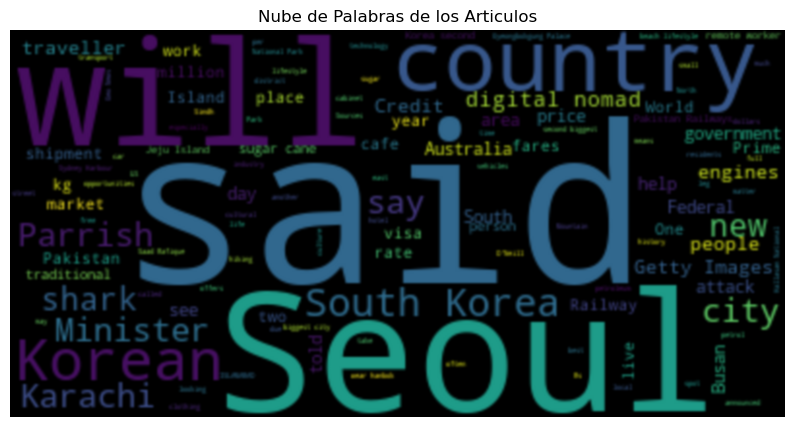

In [250]:
wordcloud = WordCloud(background_color='black').generate(' '.join(df['articles']))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('Nube de Palabras de los Articulos')
plt.show()

In [251]:
def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation and char not in string.digits])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return text

df['articles_cleaned'] = df['articles'].apply(preprocess_text)

df['articles_cleaned'][:5]

0    KARACHI Sindh government decided bring public ...
1    HONG KONG Hong Kong shares opened percent lowe...
2    KARACHI Wholesale market rates sugar dropped l...
3    ISLAMABAD Long queues vehicles fuel stations v...
4    KARACHI final shipment Chinese manufactured Ra...
Name: articles_cleaned, dtype: object

 ### 2)  Calculando las puntuaciones tf-idf


In [252]:
vectorizer = CountVectorizer()

vectorizer_transformed = vectorizer.fit_transform(df['articles_cleaned'])

counts = pd.DataFrame(vectorizer_transformed.toarray(), columns=vectorizer.get_feature_names_out())
counts.index = ['articulo {}'.format(i+1) for i in range(len(counts))]
counts

,abbasi,abide,absolutely,accessible,according,across,active,activities,actually,added,...,would,writes,year,years,yell,yeongjusan,yi,youre,youve,yuan
articulo 1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
articulo 3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
articulo 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
articulo 9,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
articulo 10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,2


In [253]:
transformer = TfidfTransformer(norm=None)

fidf_scores_transformed = transformer.fit_transform(counts)
transformer_result = pd.DataFrame(fidf_scores_transformed.toarray(),columns=transformer.get_feature_names_out())

transformer_result

,abbasi,abide,absolutely,accessible,according,across,active,activities,actually,added,...,would,writes,year,years,yell,yeongjusan,yi,youre,youve,yuan
0,0.000000,2.871802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.871802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.871802,...,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.743604,0.000000,0.000000,5.743604


In [254]:
tfidf_vectorizer = TfidfVectorizer(norm=None)

tfidf_vectorizer_transformed = tfidf_vectorizer.fit_transform(df['articles_cleaned'])
tfidf_vectorizer_result = pd.DataFrame(tfidf_vectorizer_transformed.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

tfidf_vectorizer_result

,abbasi,abide,absolutely,accessible,according,across,active,activities,actually,added,...,would,writes,year,years,yell,yeongjusan,yi,youre,youve,yuan
0,0.000000,2.871802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.871802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.871802,...,2.466337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.743604,0.000000,0.000000,5.743604


##### ¿Las puntuaciones de tf-idf generadas por TfidfVectorizer son iguales a las generadas por TfidfTransformer?

In [255]:
print('Are the tf-idf scores the same?')
if np.allclose(fidf_scores_transformed.todense(),
    tfidf_vectorizer_transformed.todense()):
    print('YES')
else:
    print('No, something is wrong :(')

Are the tf-idf scores the same?
YES


 ### 3) Análisis de los resultados


In [256]:
print("Words with the highest tf-idf:")
for index,row in tfidf_vectorizer_result.iterrows():
    print(f'Word: "{row.idxmax()}" Score: {row.max():.3f}')

Words with the highest tf-idf:
Word: "fares" Score: 11.487
Word: "hong" Score: 5.744
Word: "sugar" Score: 20.103
Word: "petrol" Score: 8.615
Word: "engines" Score: 17.231
Word: "dollars" Score: 8.615
Word: "apple" Score: 5.744
Word: "railways" Score: 9.865
Word: "cabinet" Score: 8.615
Word: "china" Score: 5.744
Word: "shark" Score: 14.359
Word: "seoul" Score: 43.077


#### ¿La lista de términos anterior dan alguna idea de cuál es el contenido (tema) de los artículos?


Si, para tener una idea muy rápido de que puede ir el artículo periodístico es muy útil